In [47]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

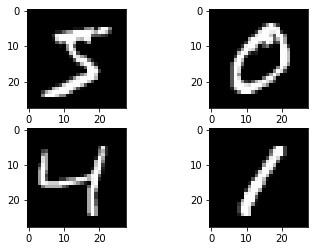

In [14]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

print(X_train.shape)
print(max(X_train[1]))

(60000, 784)
255.0


In [20]:
X_train = X_train / 255
X_test = X_test / 255

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)
print(y_train[0])

10
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [27]:
def baseline_model():
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [28]:
model = baseline_model()

for layer in model.layers:
    print(layer.output_shape)

(None, 784)
(None, 10)


In [44]:
model = baseline_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2765 - accuracy: 0.9219 - val_loss: 0.1414 - val_accuracy: 0.9588
Epoch 2/10
300/300 - 4s - loss: 0.1110 - accuracy: 0.9675 - val_loss: 0.0980 - val_accuracy: 0.9705
Epoch 3/10
300/300 - 4s - loss: 0.0708 - accuracy: 0.9790 - val_loss: 0.0792 - val_accuracy: 0.9741
Epoch 4/10
300/300 - 4s - loss: 0.0493 - accuracy: 0.9860 - val_loss: 0.0686 - val_accuracy: 0.9782
Epoch 5/10
300/300 - 4s - loss: 0.0358 - accuracy: 0.9901 - val_loss: 0.0664 - val_accuracy: 0.9783
Epoch 6/10
300/300 - 4s - loss: 0.0258 - accuracy: 0.9931 - val_loss: 0.0570 - val_accuracy: 0.9826
Epoch 7/10
300/300 - 4s - loss: 0.0186 - accuracy: 0.9958 - val_loss: 0.0603 - val_accuracy: 0.9807
Epoch 8/10
300/300 - 4s - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.0615 - val_accuracy: 0.9805
Epoch 9/10
300/300 - 4s - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.0612 - val_accuracy: 0.9804
Epoch 10/10
300/300 - 4s - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.0564 - val_accuracy: 0.9824

In [90]:
def history_vizualization(history):
  fig, ax = plt.subplots(2, 1, figsize=(15, 8))
  ax[0].plot(history.history['accuracy'])
  ax[0].plot(history.history['val_accuracy'])
  ax[0].set_title('Model accuracy')
  ax[0].set_ylabel('Accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].legend(['Train', 'Test'], loc='upper left')
 
  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'])
  ax[1].set_title('Model loss')
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epoch')
  ax[1].legend(['Train', 'Test'], loc='upper left')

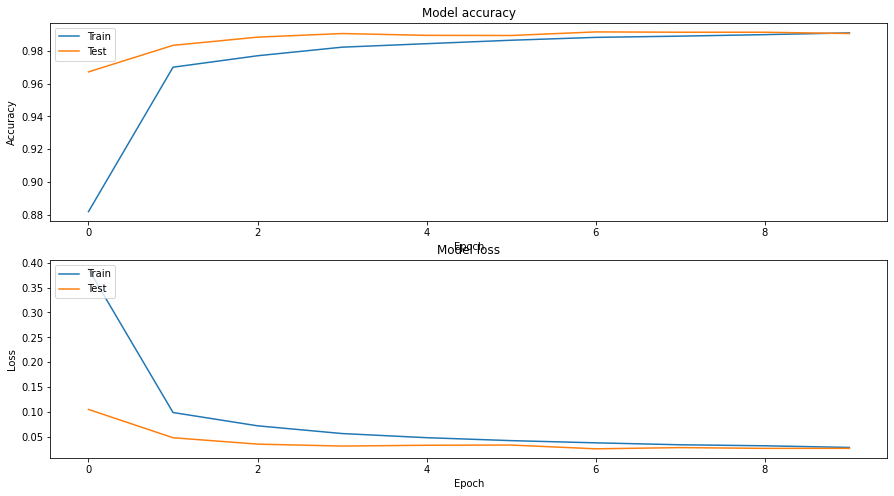

In [91]:
history_vizualization(history)